In [105]:
import pandas as pd

df = pd.read_excel("C:/Users/ajjadhav/Downloads/2015-2019 DATASET.xlsx")

In [106]:
ColumnToPredict = 'CO'

In [107]:
df.head()

,date,CO,O3,NO,NO2,NOX,NH3,SO2,PM2.5,PM10
0,2015-04-01,0.9,14.1,3.7,44.2,48,10.2,7.6,29,50.0
1,2015-04-02,0.56,9.8,3.8,40.1,44,10.8,8.5,20,37.0
2,2105-04-03,1.06,15.3,3.5,40,43.5,11.6,3.6,20,37.0
3,2015-04-04,0.94,18.7,2.9,43.1,46,9.7,3.5,32,58.0
4,2015-04-05,0.92,18,2.7,41.3,44,9.8,4.4,36,61.0


In [108]:
df.shape

(2050, 10)

In [109]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [110]:
df.dropna(subset=[ColumnToPredict], inplace=True)

In [111]:
df.shape

(1940, 10)

In [112]:
df.date = pd.to_datetime(df.date)

In [113]:
df.isna().sum()

date     0
CO       0
O3       0
NO       0
NO2      0
NOX      0
NH3      0
SO2      0
PM2.5    3
PM10     6
dtype: int64

In [114]:
df[ColumnToPredict] = df[ColumnToPredict].apply(lambda x: str(x).replace(u'\xa0',' ') )


In [115]:
df.shape

(1940, 10)

In [116]:
df[ColumnToPredict] = pd.to_numeric(df[ColumnToPredict])

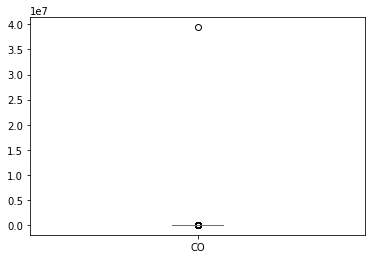

In [117]:
df[ColumnToPredict].plot(kind='box')

In [118]:
df = df[df[ColumnToPredict] < 2]

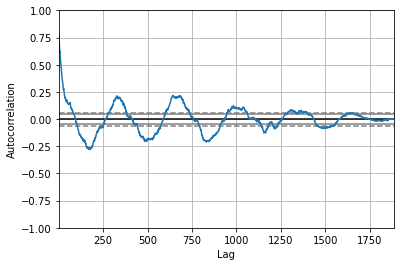

In [119]:
autocorrelation_plot(df['CO'])
#pyplot.show()

In [120]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[ColumnToPredict], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

C:\Users\ajjadhav\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ajjadhav\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\ajjadhav\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                     CO   No. Observations:                 1885
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 637.834
Date:                Tue, 04 May 2021   AIC                          -1263.668
Time:                        17:01:31   BIC                          -1230.421
Sample:                             0   HQIC                         -1251.424
                               - 1885                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4904      0.013    -39.195      0.000      -0.515      -0.466
ar.L2         -0.3295      0.016    -20.630      0.000      -0.361      -0.298
ar.L3         -0.2330      0.018    -12.823      0.0

In [121]:
X = df[ColumnToPredict].values
size = int(len(X) * 0.92)
train, test = X[0:size], X[size:len(X)]

In [122]:
df.Year = df.date.dt.year

<ipython-input-122-3f70653d2a83>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Year = df.date.dt.year


In [123]:
test_ = df[df.Year==2020]
train_ = df[df.Year!=2020]

test = test_[ColumnToPredict].values
train = train_[ColumnToPredict].values

In [124]:
train.shape

(1587,)

In [125]:
test.shape

(298,)

In [126]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts


predicted=1.730155, expected=1.530000
predicted=1.642066, expected=1.070000
predicted=1.385004, expected=0.830000
predicted=1.170342, expected=1.040000
predicted=1.153529, expected=0.950000
predicted=1.052902, expected=1.270000
predicted=1.142803, expected=1.230000
predicted=1.138250, expected=0.920000
predicted=1.018741, expected=1.110000
predicted=1.084034, expected=1.220000
predicted=1.169973, expected=1.110000
predicted=1.131008, expected=0.860000
predicted=0.976794, expected=1.090000
predicted=1.064295, expected=1.010000
predicted=1.043878, expected=1.180000
predicted=1.109471, expected=1.080000
predicted=1.063770, expected=1.020000
predicted=1.048362, expected=0.980000
predicted=1.020991, expected=1.070000
predicted=1.062902, expected=1.260000
predicted=1.156418, expected=1.150000
predicted=1.126267, expected=1.090000
predicted=1.099590, expected=1.180000
predicted=1.150034, expected=1.170000
predicted=1.169221, expected=1.130000
predicted=1.144559, expected=0.960000
predicted=1.

predicted=0.696117, expected=0.610000
predicted=0.653599, expected=0.800000
predicted=0.736318, expected=0.750000
predicted=0.729744, expected=0.740000
predicted=0.728595, expected=0.750000
predicted=0.733493, expected=0.670000
predicted=0.710464, expected=0.800000
predicted=0.762894, expected=0.770000
predicted=0.760013, expected=0.870000
predicted=0.811572, expected=0.840000
predicted=0.811315, expected=0.870000
predicted=0.841782, expected=0.930000
predicted=0.883109, expected=0.890000
predicted=0.884475, expected=0.830000
predicted=0.854558, expected=0.870000
predicted=0.869283, expected=0.870000
predicted=0.875644, expected=0.910000
predicted=0.891288, expected=0.970000
predicted=0.922916, expected=0.990000
predicted=0.949669, expected=0.860000
predicted=0.896870, expected=0.930000
predicted=0.922783, expected=0.910000
predicted=0.923062, expected=0.910000
predicted=0.919461, expected=1.060000
predicted=0.983939, expected=0.860000
predicted=0.910361, expected=0.930000
predicted=0.

Test RMSE: 0.142


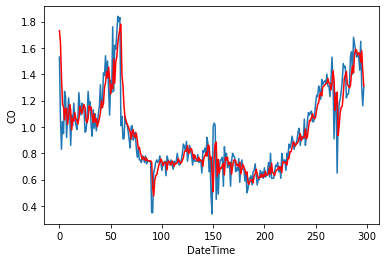

In [128]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')

pyplot.xlabel("DateTime")
pyplot.ylabel(ColumnToPredict)

pyplot.show()

In [129]:
TR = train_[['date',ColumnToPredict]]

In [130]:
PRED = test_[['date']]

In [131]:
len(history)

1885

In [132]:
len(predictions)

298

In [133]:
PRED['Forecast'] = predictions

<ipython-input-133-ca88f00a75eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PRED['Forecast'] = predictions


In [134]:
OP = pd.concat([TR,PRED],axis=0)

In [135]:
OP.set_index('date', inplace=True)


In [136]:
OP.tail(180)

,CO,Forecast
date,,
2020-05-03,NaN,0.726285
2020-05-04,NaN,0.728289
2020-05-05,NaN,0.745578
2020-05-06,NaN,0.768283
2020-05-07,NaN,0.811429
...,...,...
2020-11-05,NaN,1.557593
2020-11-06,NaN,1.490820
2020-11-07,NaN,1.578322


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669., 737791.]),
 <a list of 10 Text major ticklabel objects>)

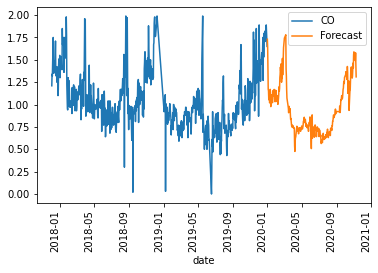

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
OP.tail(1000).plot()
plt.xticks(rotation=90)